## Project On Predicting Heart Disease Data with Machine Learning Techniques.

Importing python libraries!

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

Loading the dataset.

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Roc curve/HeartDisease.csv")

Displaying DataSet.

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


# EDA(EXPLORATORY DATA ANALYSIS)

*EDA refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis, to check assumptions, summary statistics and graphical representations.*

In [ ]:
#Number of rows and columns in dataset.
data.shape

(319795, 18)

Checking null values.

In [ ]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Ok, There is no missing value. So we don't have to handle missing value.

Basic information about the dataset.

In [ ]:
data.info

<bound method DataFrame.info of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No               3   
1                No  20.34      No              No    Yes               0   
2                No  26.58     Yes              No     No              20   
3                No  24.21      No              No     No               0   
4                No  23.71      No              No     No              28   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No               7   
319791           No  29.84     Yes              No     No               0   
319792           No  24.24      No              No     No               0   
319793           No  32.81      No              No     No               0   
319794           No  46.56      No              No     No               0   

        MentalHealth DiffWalking     Sex  A

Descrive the data or descriptive statistics

Data description of the numeric features.

In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Note: There are only 25% people who have greater than 31.4 BMI.

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Checking unique value in single variable.

In [ ]:
unique_value=[]
for col in data.columns:
  unique_value.append((data[col].unique().sum()))

Displaying unique values in each category!

In [ ]:
unique_value

['NoYes',
 132158.28,
 'YesNo',
 'NoYes',
 'NoYes',
 465,
 465,
 'NoYes',
 'FemaleMale',
 '55-5980 or older65-6975-7940-4470-7460-6450-5445-4918-2435-3930-3425-29',
 'WhiteBlackAsianAmerican Indian/Alaskan NativeOtherHispanic',
 'YesNoNo, borderline diabetesYes (during pregnancy)',
 'YesNo',
 'Very goodFairGoodPoorExcellent',
 300,
 'YesNo',
 'NoYes',
 'YesNo']

Unique value of single variable.

In [ ]:
data['HeartDisease'].unique().sum()

'NoYes'

In [ ]:
data['MentalHealth'].unique().sum()

465

In [ ]:
data['AgeCategory'].unique().sum()

'55-5980 or older65-6975-7940-4470-7460-6450-5445-4918-2435-3930-3425-29'

Counting the value of variables.

In [ ]:
data.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

# Univariate Analysis
Univariate analysis is the independent analysis of each column.

Knowing the datatypes of each variable

In [ ]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

Countplot for Categorical Variable.

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

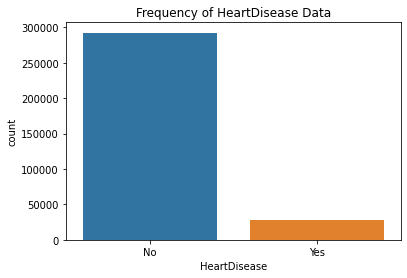

In [ ]:
sns.countplot(data.HeartDisease)
plt.title("Frequency of HeartDisease Data")
data.HeartDisease.value_counts()

Actually countplot displays the counts of each category.

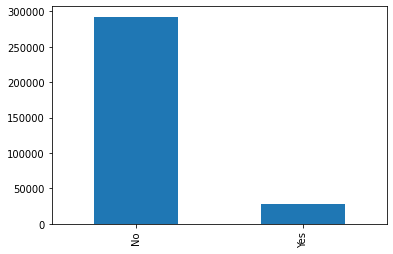

In [ ]:
data.HeartDisease.value_counts().plot(kind="bar")
plt.show()

Countplot of sex column.

Female    167805
Male      151990
Name: Sex, dtype: int64

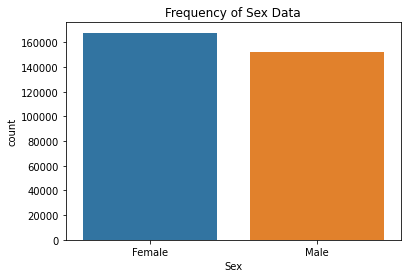

In [ ]:
sns.countplot(data.Sex)
plt.title("Frequency of Sex Data")
data.Sex.value_counts()

Countplot of smoking column.

No     187887
Yes    131908
Name: Smoking, dtype: int64

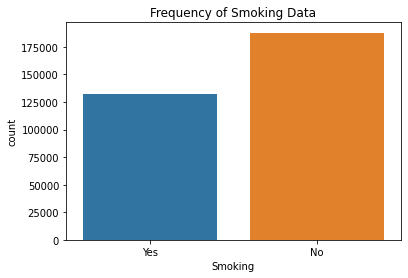

In [ ]:
sns.countplot(data.Smoking)
plt.title("Frequency of Smoking Data")
data.Smoking.value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

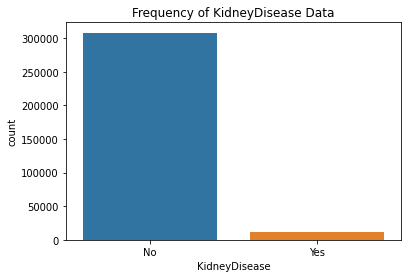

In [ ]:
sns.countplot(data.KidneyDisease)
plt.title("Frequency of KidneyDisease Data")
data.KidneyDisease.value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

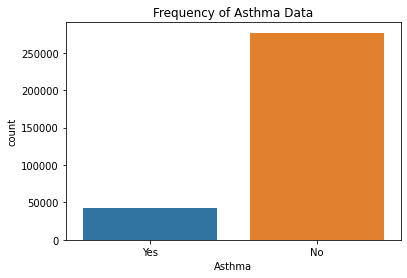

In [ ]:
sns.countplot(data.Asthma)
plt.title("Frequency of Asthma Data")
data.Asthma.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

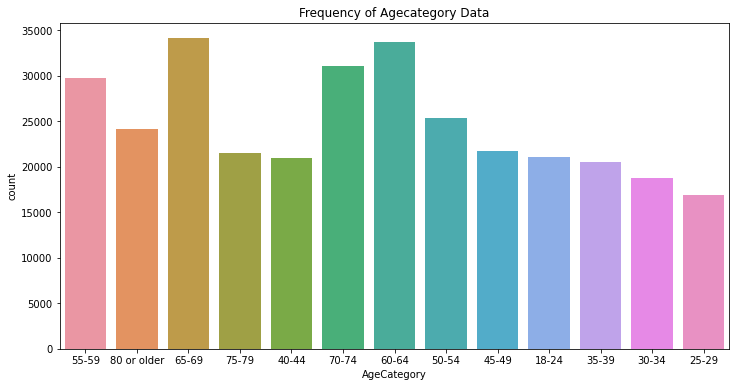

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data.AgeCategory)
plt.title("Frequency of Agecategory Data")
data.AgeCategory.value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

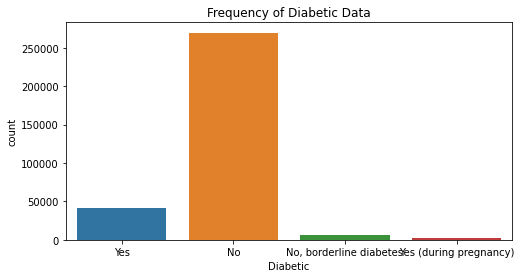

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data.Diabetic)
plt.title("Frequency of Diabetic Data")
data.Diabetic.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

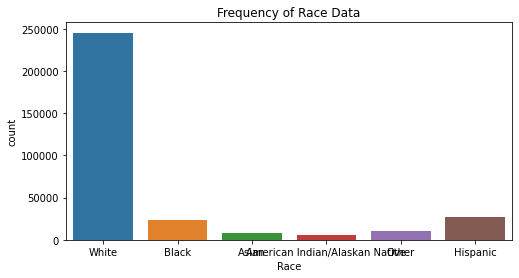

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data.Race)
plt.title("Frequency of Race Data")
data.Race.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

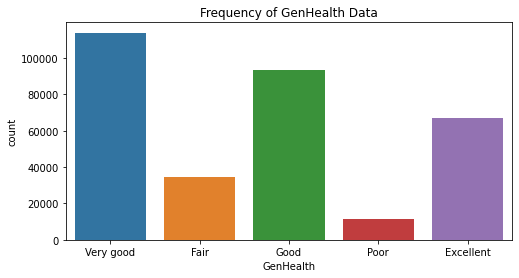

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data.GenHealth)
plt.title("Frequency of GenHealth Data")
data.GenHealth.value_counts()

Pie Chart

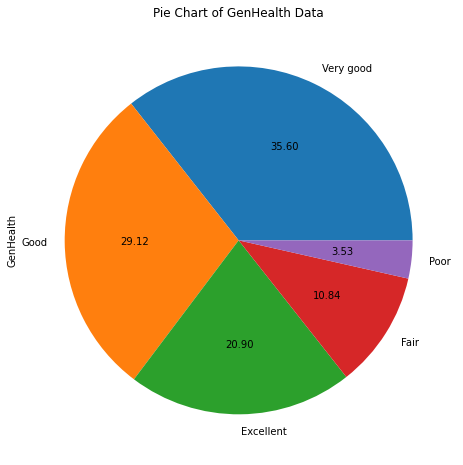

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Pie Chart of GenHealth Data")
data.GenHealth.value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

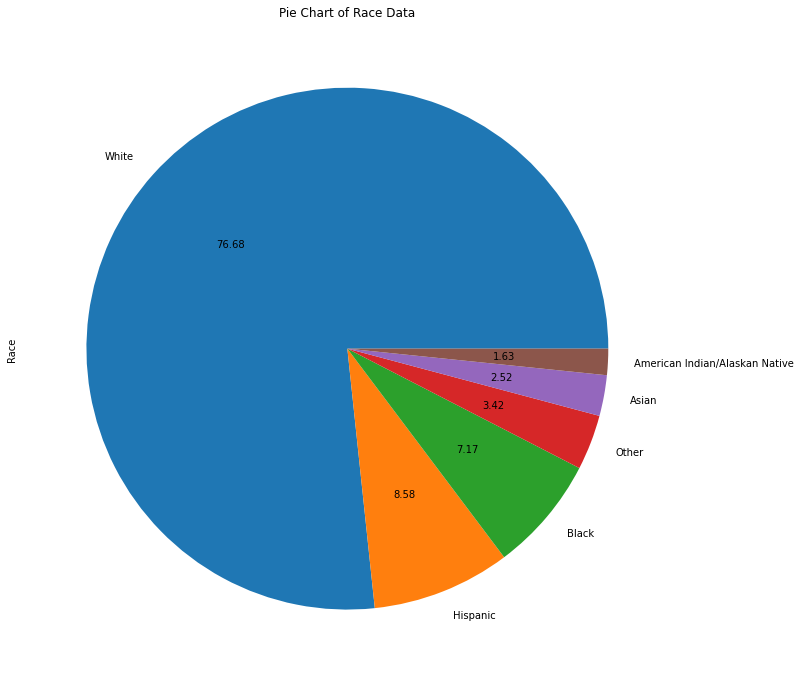

In [ ]:
plt.figure(figsize=(15,12))
plt.title("Pie Chart of Race Data")
data.Race.value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

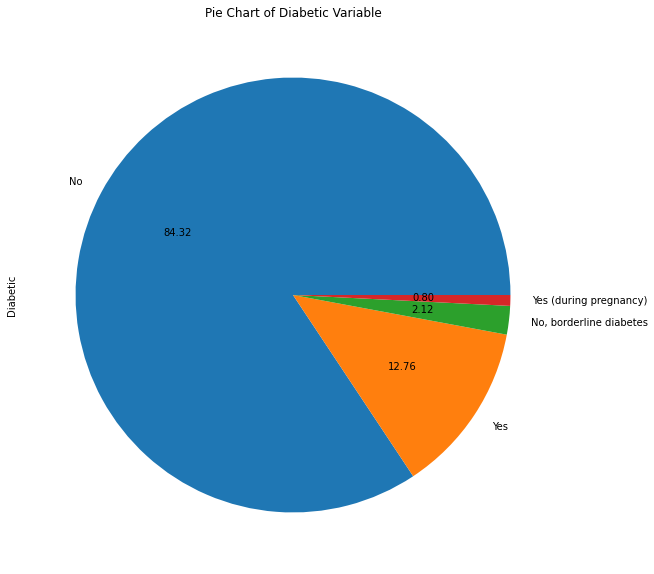

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Pie Chart of Diabetic Variable")
data.Diabetic.value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

Plotting numerical variable.

In [ ]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

BMI, PhysicalHealth, MentalHealth and SleepTime are the 4 numeric variables.

Histogram.
Histogram is basically used for showing the distribution of numeric variable.

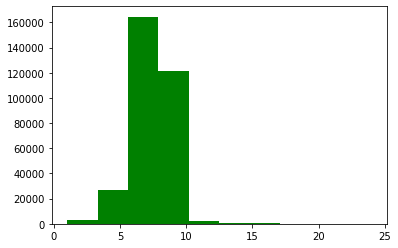

In [ ]:
plt.hist(data.SleepTime, color="green")
plt.show()

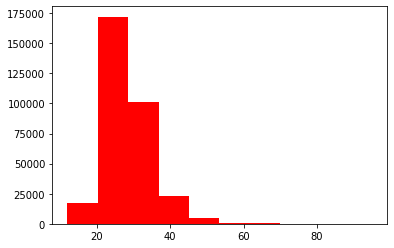

In [ ]:
plt.hist(data.BMI,color="RED")
plt.show()

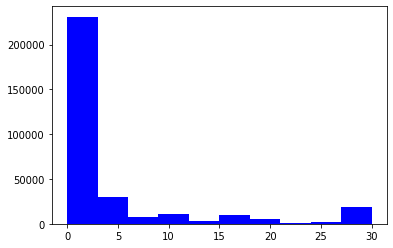

In [ ]:
plt.hist(data.MentalHealth,color="Blue")
plt.show()

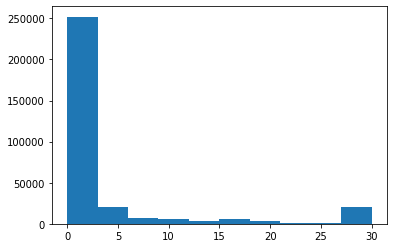

In [ ]:
plt.hist(data.PhysicalHealth)
plt.show()

Distribution plot of the numeric variable.

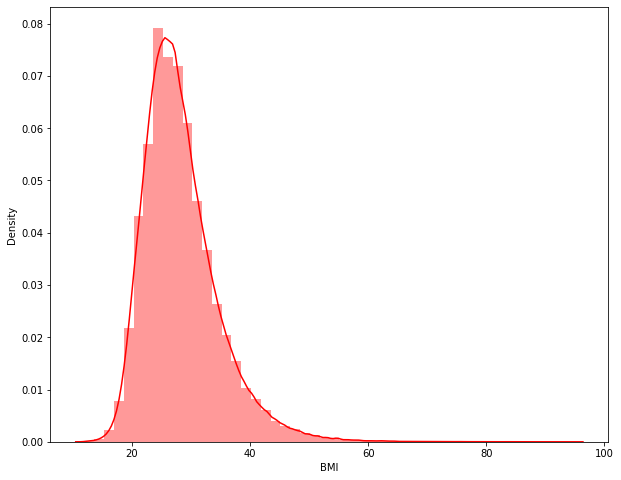

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data.BMI,color="red")
plt.show()

This curve line called the kde(kernel density estimation) or pdf(probability distribution function)

Boxplot!

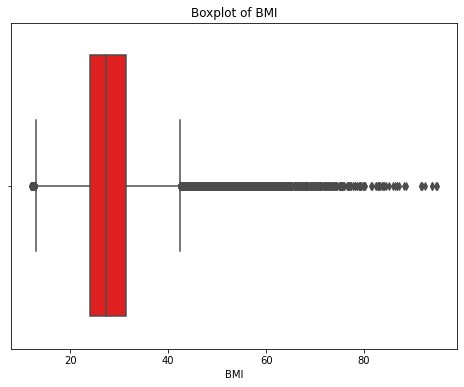

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data.BMI, color="red")
plt.title("Boxplot of BMI")
plt.show()

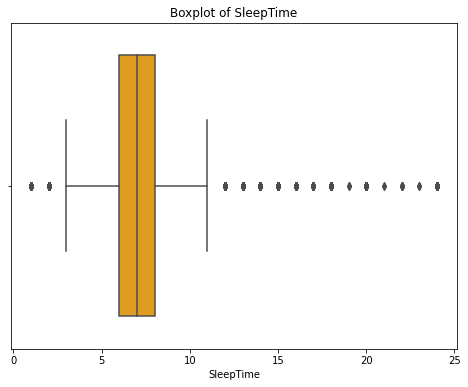

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data.SleepTime, color="orange")
plt.title("Boxplot of SleepTime")
plt.show()

## Bivariate Analysis and Multivariate Analysis.

ScatterPlot

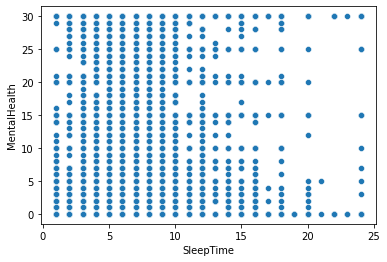

In [ ]:
sns.scatterplot(data.SleepTime, data.MentalHealth)
plt.show()

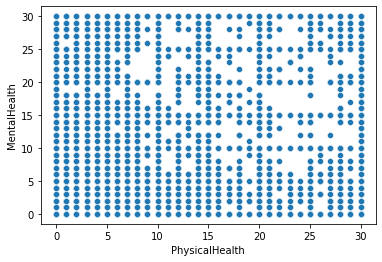

In [ ]:
sns.scatterplot(data.PhysicalHealth, data.MentalHealth)
plt.show()

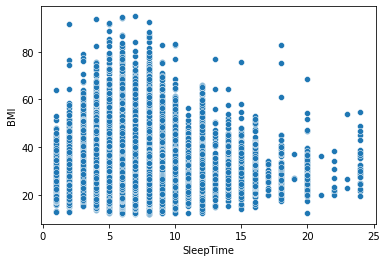

In [ ]:
sns.scatterplot(data.SleepTime, data.BMI)
plt.show()

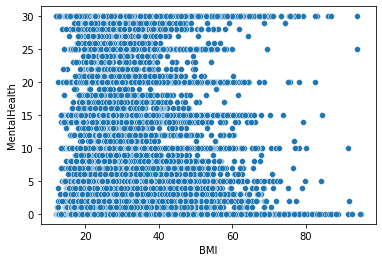

In [ ]:
sns.scatterplot(data.BMI, data.MentalHealth)
plt.show()

There is not any significant association between numeric variable.

Correlation between Numeical columns.

In [ ]:
data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


Though in this dataset, we don’t see any strong correlation between any two continuous variables, in some datasets, continuous variables could be strongly correlated and the values of one might depend on others.



Barplot

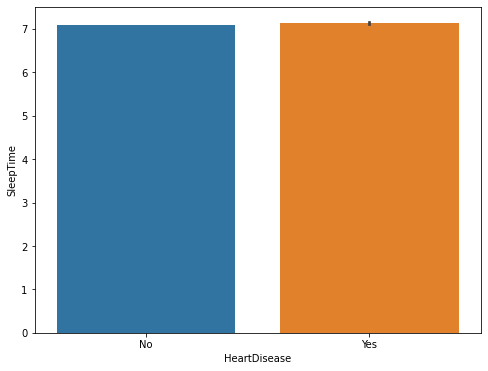

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data.HeartDisease, data.SleepTime)
plt.show()

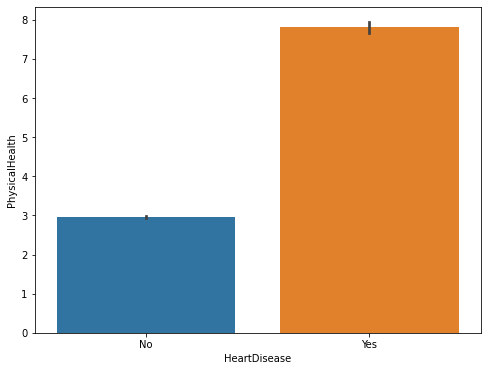

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data.HeartDisease, data.PhysicalHealth)
plt.show()

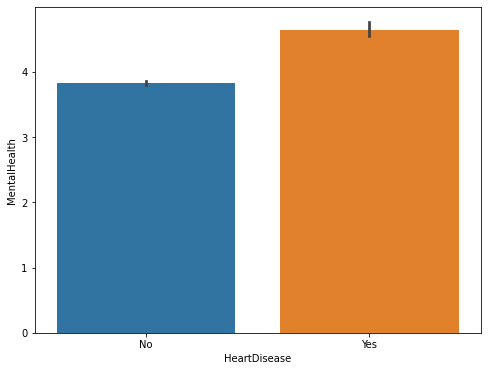

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data.HeartDisease, data.MentalHealth)
plt.show()

Barplot of heartdisease by sex.

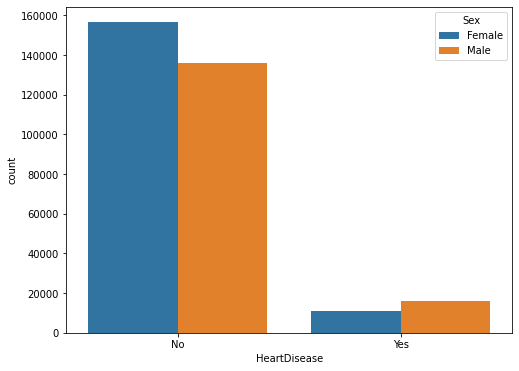

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data.HeartDisease, hue=data.Sex)
plt.show()

Barplot of heartdisease by smoking.

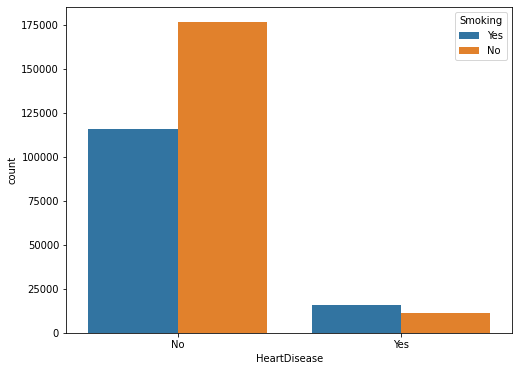

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data.HeartDisease, hue=data.Smoking)
plt.show()

Barplot of heartdisease by race variable.

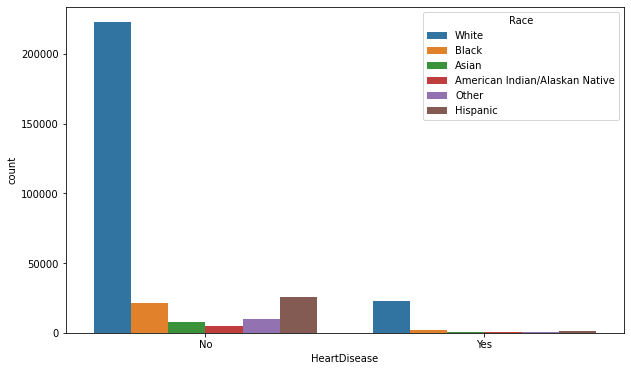

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data.HeartDisease, hue=data.Race)
plt.show()

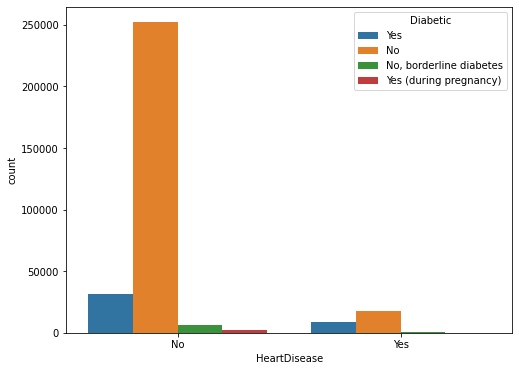

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data.HeartDisease, hue=data.Diabetic)
plt.show()

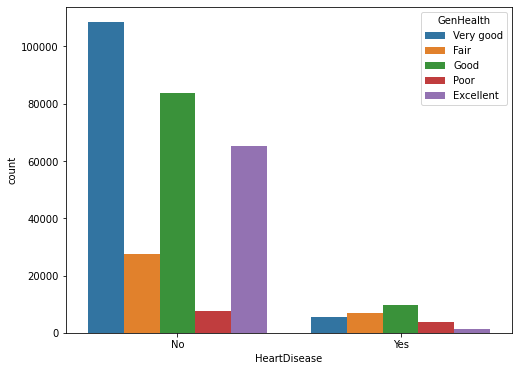

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data.HeartDisease, hue=data.GenHealth)
plt.show()

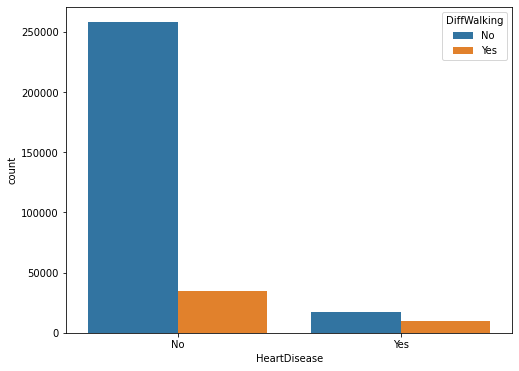

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data.HeartDisease, hue=data.DiffWalking)
plt.show()

Boxplot

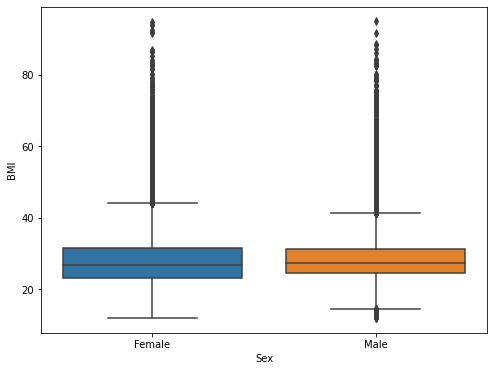

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data.Sex, data.BMI)
plt.show()

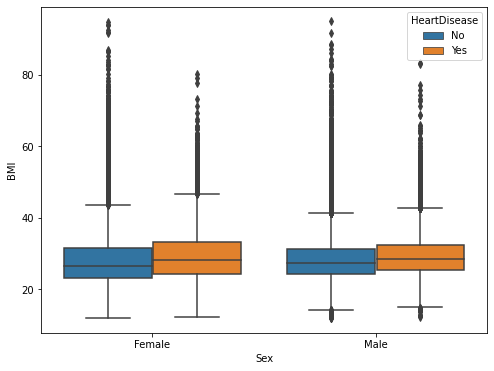

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data.Sex, data.BMI, hue=data.HeartDisease)
plt.show()

DensityPlot

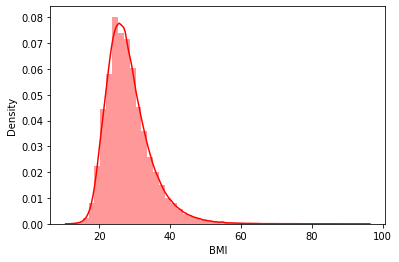

In [ ]:
sns.distplot(data[data["HeartDisease"]=="No"].BMI, color="Red")
plt.show()

Density plot of mental health by heartdisease.

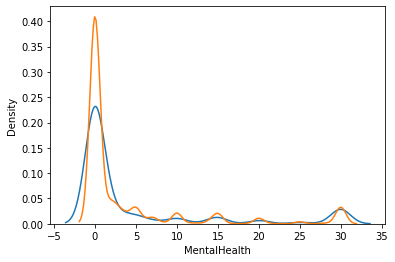

In [ ]:
sns.distplot(data[data["HeartDisease"]=="Yes"].MentalHealth, hist=False)
sns.distplot(data[data["HeartDisease"]=="No"].MentalHealth, hist=False)
plt.show()

Density plot of mental health by heartdisease.

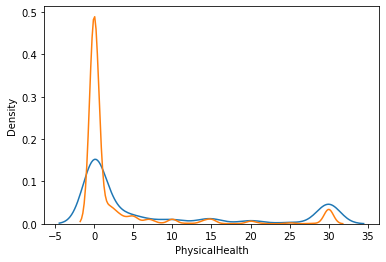

In [ ]:
sns.distplot(data[data["HeartDisease"]=="Yes"].PhysicalHealth, hist=False)
sns.distplot(data[data["HeartDisease"]=="No"].PhysicalHealth, hist=False)
plt.show()

## Crosstab.

In [ ]:
pd.crosstab(data.Sex, data.HeartDisease)

HeartDisease,No,Yes
Sex,,
Female,156571,11234
Male,135851,16139


Female having heart disease. 



In [ ]:
(11234/(156571+11234))*100

6.6946753672417385

The percentage of having heartdisease in the female group is 6.69%.

Male having heart disease.

In [ ]:
16139/(16139+135851)*100

10.618461740904008

The percentage of having heartdisease in the male group is 10.62%.

Crosstab of Smoking Vs. HeartDisease

In [ ]:
pd.crosstab(data.Smoking, data.HeartDisease)

HeartDisease,No,Yes
Smoking,,
No,176551,11336
Yes,115871,16037


Percentage of having heart disease of Non-Smokers.

In [ ]:
11336/(17655+11336)*100

39.10179021075506

Percentage of having heart disease of Smokers.

In [ ]:
16037/(11587+16037)*100

58.05459021141037

The percentage of having heartdisease in the smokers group is 19.05% greater than the non-smokers group.

Displaying mean of numrical value by sex.

In [ ]:
data.groupby(by="Sex").agg("mean")[["BMI","SleepTime","MentalHealth","PhysicalHealth"]]

,BMI,SleepTime,MentalHealth,PhysicalHealth
Sex,,,,
Female,28.162436,7.118536,4.655916,3.681225
Male,28.505317,7.073380,3.061991,3.029989


In [ ]:
data.groupby(by="HeartDisease").agg("mean")[["BMI","SleepTime","MentalHealth","PhysicalHealth"]]

,BMI,SleepTime,MentalHealth,PhysicalHealth
HeartDisease,,,,
No,28.224658,7.093416,3.828778,2.956416
Yes,29.401592,7.136156,4.641764,7.808242


*  The average bmi of having heart disease people is 29.40.
*  The avg. value of BMI, sleeptime, mentalhealth and physicalhealth having heart disease is greater than the avg. value of not having heart disease.



In [ ]:
pd.crosstab(data.AgeCategory, data.HeartDisease)

HeartDisease,No,Yes
AgeCategory,,
18-24,20934,130
25-29,16822,133
30-34,18527,226
35-39,20254,296
40-44,20520,486
45-49,21047,744
50-54,23999,1383
55-59,27555,2202
60-64,30359,3327


The people of 60-64 and 65-69 age-group have the highest heart disease.

Cluster map for categorical variable.

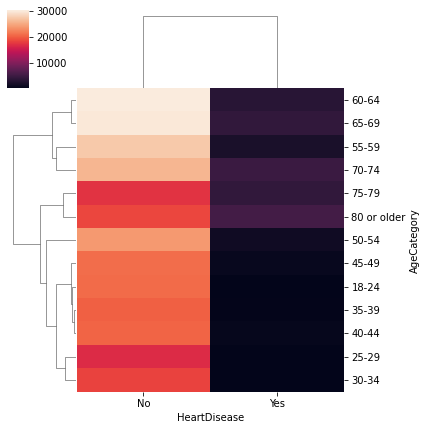

In [ ]:
sns.clustermap(pd.crosstab(data.AgeCategory, data.HeartDisease), figsize=(6,6))
plt.show()

Heatmap of Correlation Matrix!

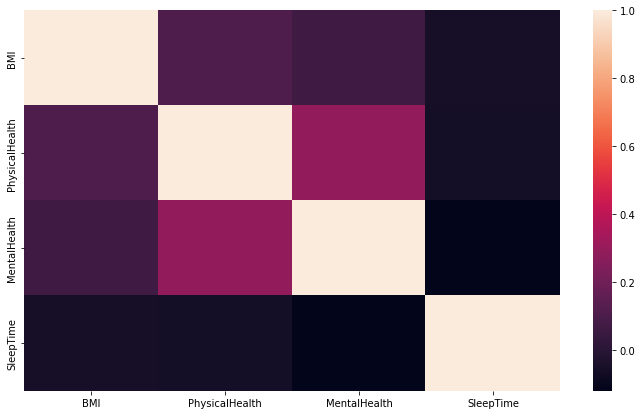

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr())
plt.show()

Pairplot of nummeric variable.

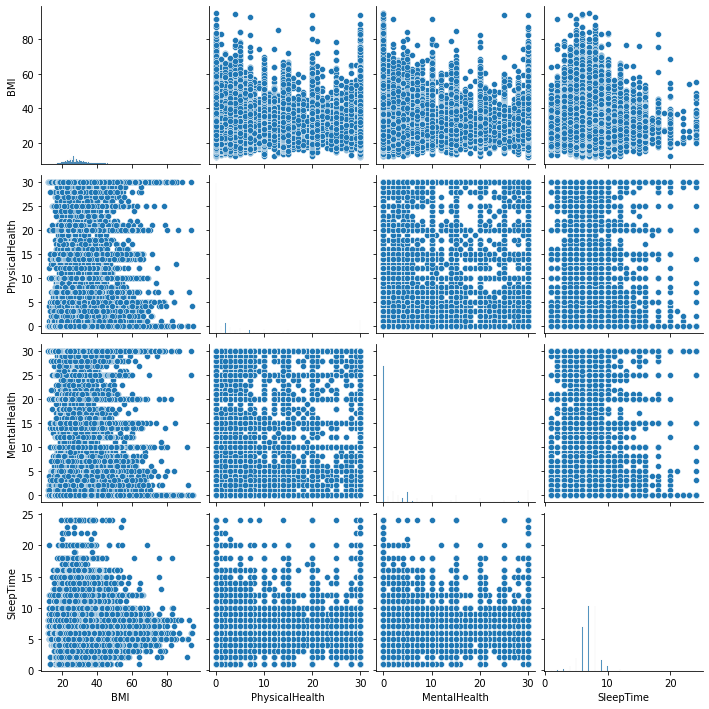

In [ ]:
sns.pairplot(data)
plt.show()

Pairplot of numeric values by sex.

<function matplotlib.pyplot.show(*args, **kw)>

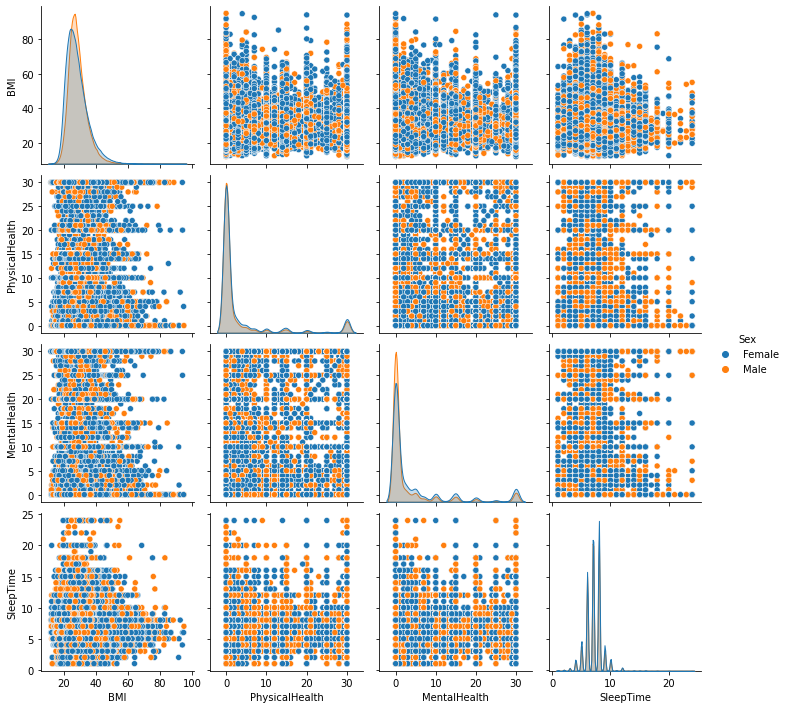

In [ ]:
sns.pairplot(data,hue="Sex")
plt.show

Pairplot of numeric variable by heartdisease.

<function matplotlib.pyplot.show(*args, **kw)>

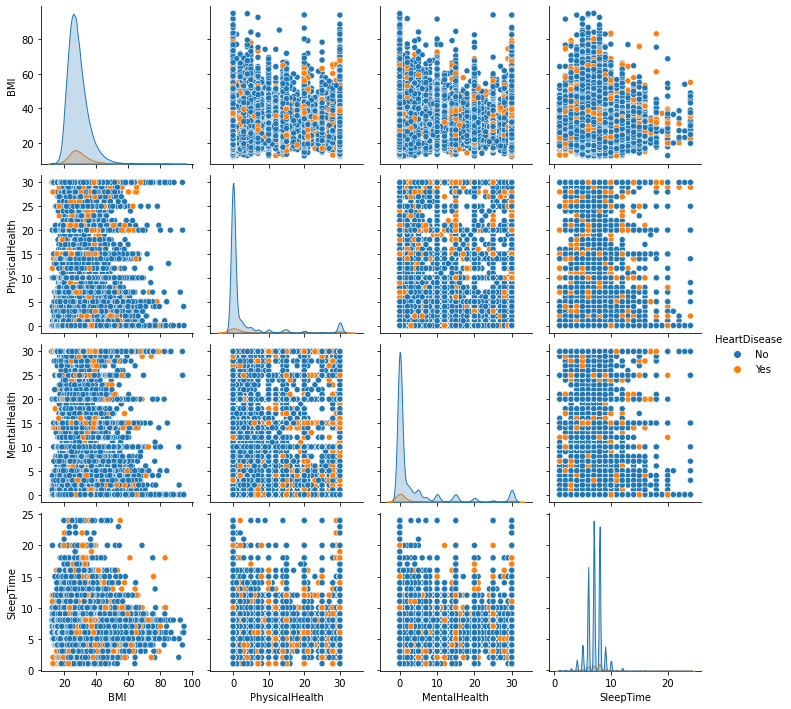

In [ ]:
sns.pairplot(data,hue="HeartDisease")
plt.show

## Data Preprocessing [Outlier Detection]

Standard Deviation of numeric data.

In [ ]:
data.std()

BMI               6.356100
PhysicalHealth    7.950850
MentalHealth      7.955235
SleepTime         1.436007
dtype: float64

Standard deviation greater than +2 is not good.

Checking the skewness and kurtosis of numeric data.


---



---



In [ ]:
from scipy.stats import kurtosis, skew
print(data.skew())

BMI               1.332431
PhysicalHealth    2.603973
MentalHealth      2.331112
SleepTime         0.679035
dtype: float64


1.   Skewness -1 to +1 excellent.
2.   Skewness >2 and <-2 shows non-normality.




BMI's and SleepTime's data distribution is good enough and closed to normally distributed. PhysicalHealth and MentalHealth data distribution shows non-normality.

In [ ]:
print(data.kurt())

BMI               3.890043
PhysicalHealth    5.528450
MentalHealth      4.403937
SleepTime         7.854869
dtype: float64


*   Kurtosis=3 is called mesokurtic has a standard normal distribution.
*   Kurtosis>3 is too peak.
*   Kurtosis<3 is too flat.






All the variables show a high value of kurtosis. That means the hight of the data distribution is too peak.

For detecting outlier we need to plot.

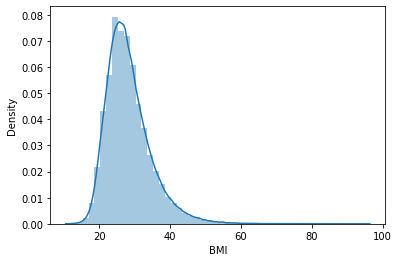

In [ ]:
sns.distplot(data.BMI)

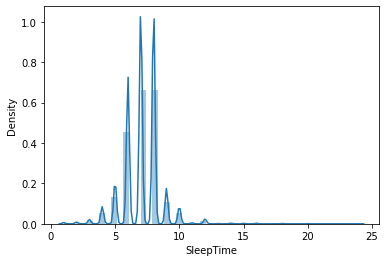

In [ ]:
sns.distplot(data.SleepTime)

We can clearly observe that there are a lot of outliers in this density plot.We need to remove these.

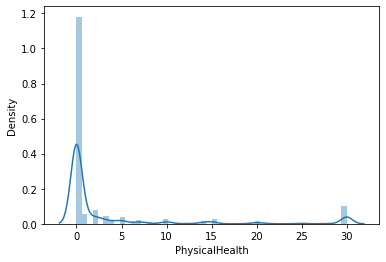

In [ ]:
sns.distplot(data.PhysicalHealth)

We can clearly observe that there are some outliers in this density plot.We need to remove these.

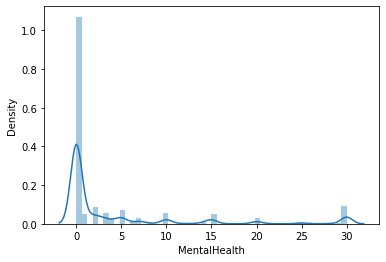

In [ ]:
sns.distplot(data.MentalHealth)

We can clearly observe that there are some outliers in this density plot.We need to remove these.

Plotting Boxplot for detecting outliers clearly.

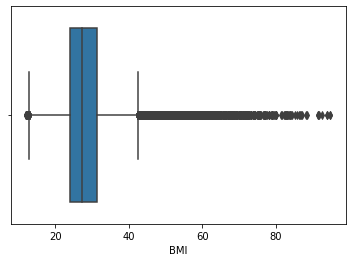

In [ ]:
sns.boxplot(data.BMI)

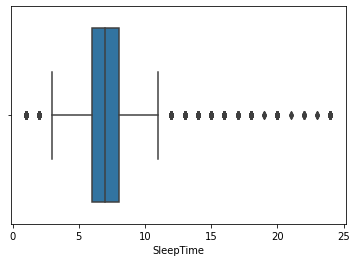

In [ ]:
sns.boxplot(data.SleepTime)

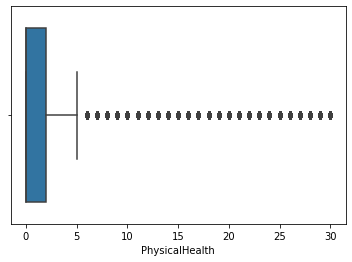

In [ ]:
sns.boxplot(data.PhysicalHealth)

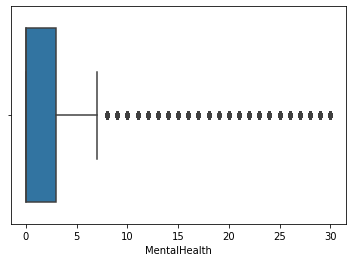

In [ ]:
sns.boxplot(data.MentalHealth)

We can remove outliers using 3 different methods including-
1.Z-score Method
2.IQR Method
3.Percentile Method

In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


IQR Method(Inter Quantile Range Method)

Computing upper limit and lower limit of BMI

In [ ]:
bmiq1=data.BMI.quantile(0.25)
bmiq3=data.BMI.quantile(0.75)
iqrbmi=bmiq3-bmiq1
lower_limit_bmi=bmiq1-1.5*iqrbmi
upper_limit_bmi=bmiq3+1.5*iqrbmi
bmiq1, bmiq3, iqrbmi,lower_limit_bmi, upper_limit_bmi

(24.03, 31.42, 7.390000000000001, 12.945, 42.505)

Computing upper limit and lower limit of SleepTime

In [ ]:
stq1=data.SleepTime.quantile(0.25)
stq3=data.SleepTime.quantile(0.75)
iqrst=stq3-stq1
lower_limit_st=stq1-1.5*iqrst
upper_limit_st=stq3+1.5*iqrst
stq1, stq3, iqrst,lower_limit_st, upper_limit_st

(6.0, 8.0, 2.0, 3.0, 11.0)

Computing upper limit and lower limit of PhysicalHealth

In [ ]:
phq1=data.PhysicalHealth.quantile(0.25)
phq3=data.PhysicalHealth.quantile(0.75)
iqrph=phq3-phq1
lower_limit_ph=phq1-1.5*iqrph
upper_limit_ph=phq3+1.5*iqrph
phq1, phq3,iqrph,lower_limit_ph, upper_limit_ph

(0.0, 2.0, 2.0, -3.0, 5.0)

Computing upper limit and lower limit of MentalHelth

In [ ]:
mhq1=data.MentalHealth.quantile(0.25)
mhq3=data.MentalHealth.quantile(0.75)
iqrmh=mhq3-mhq1
lower_limit_mh=mhq1-1.5*iqrmh
upper_limit_mh=mhq3+1.5*iqrmh
mhq1, mhq3,iqrmh,lower_limit_mh, upper_limit_mh

(0.0, 3.0, 3.0, -4.5, 7.5)

In [ ]:
new_data=data.loc[((data.BMI>lower_limit_bmi)&(data.BMI<upper_limit_bmi))&((data.SleepTime>lower_limit_st)&(data.SleepTime<upper_limit_st))&((data.PhysicalHealth>lower_limit_ph)&(data.PhysicalHealth<upper_limit_ph))&((data.MentalHealth>lower_limit_mh)&(data.MentalHealth<upper_limit_mh))]

In [ ]:
new_data.shape

(224845, 18)

In [ ]:
outlier=len(data)-len(new_data)
print("Number of Outlier in this dataset:",outlier)

Number of Outlier in this dataset: 94950


Now we should visually check the outliers.

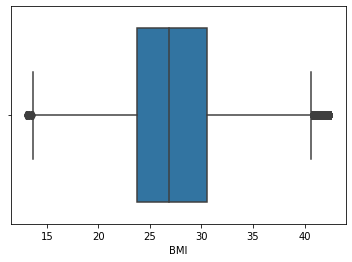

In [ ]:
sns.boxplot(new_data.BMI)

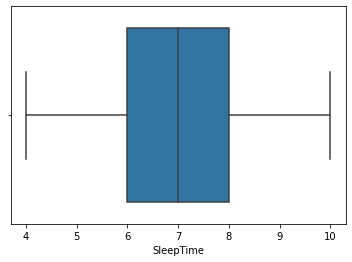

In [ ]:
sns.boxplot(new_data.SleepTime)

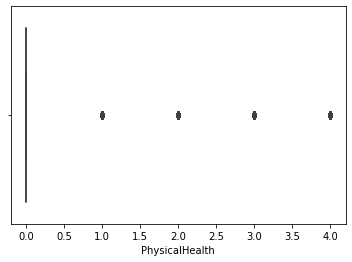

In [ ]:
sns.boxplot(new_data.PhysicalHealth)

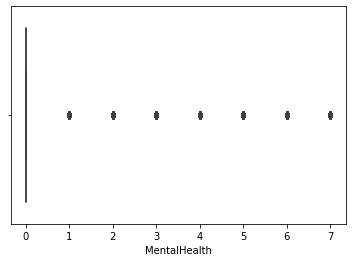

In [ ]:
sns.boxplot(new_data.MentalHealth)

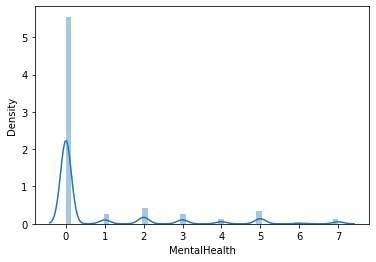

In [ ]:
sns.distplot(new_data.MentalHealth)

Z-score Method.

In [ ]:
upper_limit_bmi=data.BMI.mean()+ 3*data.BMI.std()
lower_limit_bmi=data.BMI.mean()-3*data.BMI.std()
print("Upper limit:", upper_limit_bmi)
print("Lower limit:", lower_limit_bmi)

Upper limit: 47.39369912233968
Lower limit: 9.257097919515246


Percentile Method.

In [ ]:
upper_limit_bmi=data.BMI.quantile(0.99)
lower_limit_bmi=data.BMI.quantile(0.01)
print("Upper limit:", upper_limit_bmi)
print("Lower limit:", lower_limit_bmi)

Upper limit: 48.66
Lower limit: 17.92


Data Transformation.
## Encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
lb=LabelEncoder()
oe=OrdinalEncoder()

In [ ]:
new_data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [ ]:
new_data[["AgeCategory","Race","Diabetic","GenHealth"]]=oe.fit_transform(new_data[["AgeCategory","Race","Diabetic","GenHealth"]])

In [ ]:
new_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0,0,No,Female,12.0,5.0,0.0,Yes,4.0,7,No,No,No
3,No,24.21,No,No,No,0,0,No,Female,11.0,5.0,0.0,No,2.0,6,No,No,Yes
8,No,26.45,No,No,No,0,0,No,Female,12.0,5.0,1.0,No,1.0,5,No,Yes,No
9,No,40.69,No,No,No,0,0,Yes,Male,9.0,5.0,0.0,Yes,2.0,10,No,No,No
11,No,28.71,Yes,No,No,0,0,No,Female,7.0,5.0,0.0,Yes,4.0,5,No,No,No


In [ ]:
from pandas.api.types import is_numeric_dtype
columns=new_data.columns
for i in columns:
  if is_numeric_dtype(new_data[i]):
    continue
  else:
    new_data[i]=lb.fit_transform(new_data[i])

In [ ]:
new_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0,0,0,0,12.0,5.0,0.0,1,4.0,7,0,0,0
3,0,24.21,0,0,0,0,0,0,0,11.0,5.0,0.0,0,2.0,6,0,0,1
8,0,26.45,0,0,0,0,0,0,0,12.0,5.0,1.0,0,1.0,5,0,1,0
9,0,40.69,0,0,0,0,0,1,1,9.0,5.0,0.0,1,2.0,10,0,0,0
11,0,28.71,1,0,0,0,0,0,0,7.0,5.0,0.0,1,4.0,5,0,0,0


### Balancing Imbalance Dataset.

In [ ]:
new_data.shape

(224845, 18)

In [ ]:
new_data.HeartDisease.value_counts()

0    209747
1     15098
Name: HeartDisease, dtype: int64

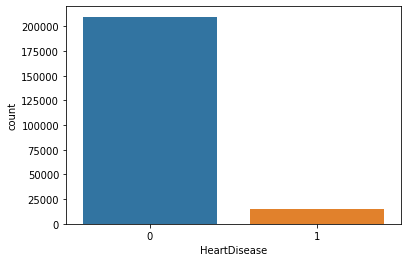

In [ ]:
sns.countplot(new_data.HeartDisease)

This data is unbalanced. We need to balance the datset.

Partitioning dependent and independent variables.

In [ ]:
x=new_data.drop("HeartDisease",axis=1)
y=new_data["HeartDisease"]

In [ ]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,20.34,0,0,1,0,0,0,0,12.0,5.0,0.0,1,4.0,7,0,0,0
3,24.21,0,0,0,0,0,0,0,11.0,5.0,0.0,0,2.0,6,0,0,1
8,26.45,0,0,0,0,0,0,0,12.0,5.0,1.0,0,1.0,5,0,1,0
9,40.69,0,0,0,0,0,1,1,9.0,5.0,0.0,1,2.0,10,0,0,0
11,28.71,1,0,0,0,0,0,0,7.0,5.0,0.0,1,4.0,5,0,0,0


In [ ]:
y.head()

1     0
3     0
8     0
9     0
11    0
Name: HeartDisease, dtype: int64

Balancing dataset with SMOTETomek udersampling and oversmapling combine techniques.

In [ ]:
from imblearn.combine import SMOTETomek
smo=SMOTETomek(random_state=42)

In [ ]:
xsample,ysample=smo.fit_resample(x,y)

In [ ]:
xsample.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,20.34,0,0,1,0,0,0,0,12.0,5.0,0.0,1,4.0,7,0,0,0
1,24.21,0,0,0,0,0,0,0,11.0,5.0,0.0,0,2.0,6,0,0,1
2,26.45,0,0,0,0,0,0,0,12.0,5.0,1.0,0,1.0,5,0,1,0
3,40.69,0,0,0,0,0,1,1,9.0,5.0,0.0,1,2.0,10,0,0,0
4,28.71,1,0,0,0,0,0,0,7.0,5.0,0.0,1,4.0,5,0,0,0


In [ ]:
ysample.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

In [ ]:
ysample.value_counts()

0    207689
1    207689
Name: HeartDisease, dtype: int64

In [ ]:
xsample.shape

(415378, 17)

In [ ]:
ysample.shape

(415378,)

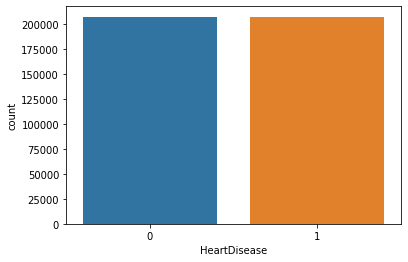

In [ ]:
sns.countplot(ysample)

Now, The data is balanced.

We need to scaled dataset before fitting a model.

# Standard Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
scaled_x=std.fit_transform(xsample)
scaled_x

array([[-1.50760315, -0.84218526, -0.19779542, ..., -0.28205893,
        -0.15870341, -0.33570986],
       [-0.73263704, -0.84218526, -0.19779542, ..., -0.28205893,
        -0.15870341,  2.97876269],
       [-0.28407784, -0.84218526, -0.19779542, ..., -0.28205893,
         6.30106187, -0.33570986],
       ...,
       [-1.13762776,  1.18738721, -0.19779542, ..., -0.28205893,
        -0.15870341, -0.33570986],
       [-0.27826937,  1.18738721, -0.19779542, ..., -0.28205893,
        -0.15870341, -0.33570986],
       [-2.03577155, -0.84218526, -0.19779542, ..., -0.28205893,
        -0.15870341, -0.33570986]])

In [ ]:
scaled_x.shape

(415378, 17)

## Model Building

Importing traintestsplit for splitting dataset.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest =train_test_split(scaled_x,ysample, test_size=0.2)

In [ ]:
xtrain.shape

(332302, 17)

In [ ]:
ytrain.shape

(332302,)

In [ ]:
xtest.shape

(83076, 17)

In [ ]:
ytest.shape

(83076,)

## Importing LogisticRegression Model

> Indented block



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
lr=LogisticRegression()

Fitting the logistic regression model.

In [ ]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
predicted_xtrain=lr.predict(xtrain)

Training Accuracy

In [ ]:
training_accuracy=accuracy_score(predicted_xtrain, ytrain)
print("Accuracy on Training Data:", training_accuracy)

Accuracy on Training Data: 0.7464294527267366


Predicting xtest data with Logistic regression model

In [ ]:
predictedy=lr.predict(xtest)

Testing Accuracy

In [ ]:
testing_accuracy=accuracy_score(predictedy, ytest)
print("Accuracy on Testing Data:",testing_accuracy )

Accuracy on Testing Data: 0.7424888054311715


We can display the training accuracy and testing accuracy with score function.

In [ ]:
tr_accuracy=lr.score(xtrain,ytrain)
te_accuracy=lr.score(xtest,ytest)
print("Training Accuracy:",tr_accuracy)
print("Testing Accuracy:",te_accuracy)

Training Accuracy: 0.7464294527267366
Testing Accuracy: 0.7424888054311715


In [ ]:
confusion_matrix(ytest, predictedy)

array([[28600, 13049],
       [ 8344, 33083]])

In [ ]:
confusion_matrix(ytrain,predicted_xtrain)

array([[115058,  50982],
       [ 33280, 132982]])

In [ ]:
print(classification_report(ytest, predictedy))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73     41649
           1       0.72      0.80      0.76     41427

    accuracy                           0.74     83076
   macro avg       0.75      0.74      0.74     83076
weighted avg       0.75      0.74      0.74     83076



K-Fold Cross Validation!

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
v=cross_val_score(lr,xtrain,ytrain,cv=10)
print(v)

[0.74800638 0.74665222 0.74583208 0.74523021 0.75007523 0.74222088
 0.74766777 0.74814926 0.74513993 0.74501956]


In [ ]:
v.mean()

0.7463993540216615

Stratified K-fold cross validation!

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skfold=StratifiedKFold(n_splits=5)

In [ ]:
vsc=cross_val_score(lr,xtrain,ytrain,cv=skfold)
print(vsc)

[0.74743082 0.74562525 0.74598255 0.74795366 0.74524526]


In [ ]:
vsc.mean()

0.7464475081068974

## Random Forest Algorithm


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
predictx=rf.predict(xtrain)

In [ ]:
predicty=rf.predict(xtest)

Training Accuracy

In [ ]:
accuracy_score(predictx,ytrain)

0.996933512287016

Testing Accuracy

In [ ]:
accuracy_score(predicty, ytest)

0.9277649381289421

In [ ]:
confusion_matrix(predicted_xtrain, ytrain)

array([[115058,  33280],
       [ 50982, 132982]])

In [ ]:
confusion_matrix(predicty, ytest)

array([[38485,  2837],
       [ 3164, 38590]])

In [ ]:
print(classification_report(predicty, ytest))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     41322
           1       0.93      0.92      0.93     41754

    accuracy                           0.93     83076
   macro avg       0.93      0.93      0.93     83076
weighted avg       0.93      0.93      0.93     83076



Principal Component Analysis(PCA)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)

In [ ]:
x_pca=pca.fit_transform(scaled_x)

In [ ]:
x_pca.shape

(415378, 10)

In [ ]:
xtrain, xtest, ytrain, ytest =train_test_split(x_pca,ysample, test_size=0.2)


In [ ]:
xtrain.shape

(332302, 10)

## Fitting logistic regression model after pca.

In [ ]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
yy=lr.predict(xtest)

In [ ]:
lr_training_accuracy=lr.score(xtrain,ytrain)
lr_training_accuracy

0.7204741470108516

In [ ]:
lr_score=lr.score(xtest,ytest)
lr_score

0.720629303288555

In [ ]:
confusion_matrix(yy,ytest)

array([[28514, 10353],
       [12856, 31353]])

In [ ]:
print(classification_report(yy,ytest))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     38867
           1       0.75      0.71      0.73     44209

    accuracy                           0.72     83076
   macro avg       0.72      0.72      0.72     83076
weighted avg       0.72      0.72      0.72     83076



## Fitting random forest model after pca.

In [ ]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
yyy=rf.predict(xtest)

In [ ]:
rf_training_accuracy=rf.score(xtrain, ytrain)
rf_training_accuracy

0.9969726333275153

In [ ]:
rf_score=rf.score(xtest, ytest)
rf_score

0.8873922673214888

In [ ]:
confusion_matrix(yyy,ytest)

array([[36152,  4137],
       [ 5218, 37569]])

In [ ]:
print(classification_report(yyy,ytest))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     40289
           1       0.90      0.88      0.89     42787

    accuracy                           0.89     83076
   macro avg       0.89      0.89      0.89     83076
weighted avg       0.89      0.89      0.89     83076



## Gradient Boosting Algorithm.



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [ ]:
predx=gbc.predict(xtrain)

In [ ]:
predy=gbc.predict(xtest)

Training Accuracy.

In [ ]:
gbc_training_accuracy=accuracy_score(predx, ytrain)
gbc_training_accuracy

0.7421983617311964

Testing Accuracy.

In [ ]:
gbc_score=accuracy_score(predy, ytest)
gbc_score

0.7402619288362463

Confusion Matrix

In [ ]:
confusion_matrix(predy, ytest)

array([[27860,  8068],
       [13510, 33638]])

In [ ]:
print(classification_report(predy,ytest))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72     35928
           1       0.81      0.71      0.76     47148

    accuracy                           0.74     83076
   macro avg       0.74      0.74      0.74     83076
weighted avg       0.75      0.74      0.74     83076



## K Nearest Neighbours Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

Training accuracy.

In [ ]:
knn_training_accuracy=knn.score(xtrain, ytrain)
knn_training_accuracy

0.8947102334623325

Testing Accuracy.

In [ ]:
knn_score=knn.score(xtest, ytest)
knn_score

0.848789060619192

In [ ]:
ypredicted=knn.predict(xtest)

In [ ]:
confusion_matrix(ypredicted, ytest)

array([[32405,  3597],
       [ 8965, 38109]])

In [ ]:
print(classification_report(ypredicted,ytest))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84     36002
           1       0.91      0.81      0.86     47074

    accuracy                           0.85     83076
   macro avg       0.85      0.85      0.85     83076
weighted avg       0.86      0.85      0.85     83076



Cross validation for KNN.

In [ ]:
vnn=cross_val_score(knn,xtrain,ytrain,cv=10)
print(vnn)

[0.8431585  0.84442238 0.84053566 0.84420704 0.84098706 0.84384592
 0.84456816 0.84489919 0.84089678 0.84426723]


In [ ]:
vnn.mean()

0.8431787915110645

## Decision Tree Classifier Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
predictingx=dt.predict(xtrain)

In [ ]:
predictingy=dt.predict(xtest)

Training accuracy for Decision tree calssifier

In [ ]:
dt_training_accuracy=accuracy_score(predictingx,ytrain)
dt_training_accuracy

0.9969876798815536

In [ ]:
accuracy_score(predictingy, ytest)

0.845262169579662

In [ ]:
dt.score(xtrain, ytrain)

0.9969876798815536

In [ ]:
dt_score=dt.score(xtest, ytest)
dt_score

0.845262169579662

In [ ]:
confusion_matrix(predictingx, ytrain)

array([[166029,    711],
       [   290, 165272]])

In [ ]:
confusion_matrix(predictingy, ytest)

array([[34226,  5711],
       [ 7144, 35995]])

In [ ]:
print(classification_report(predictingy, ytest))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84     39937
           1       0.86      0.83      0.85     43139

    accuracy                           0.85     83076
   macro avg       0.85      0.85      0.85     83076
weighted avg       0.85      0.85      0.85     83076



Cross validation score for decision tree algorithm.

In [ ]:
cvsdt=cross_val_score(dt,xtrain, ytrain,cv=5)
print(cvsdt)

[0.83495584 0.83208197 0.8329672  0.83304243 0.83501354]


In [ ]:
cvsdt.mean()

0.833777711054734

## Naive Bayes Algorithm.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()

In [ ]:
gnb.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
training_accuracy_gnb=gnb.score(xtrain, ytrain)

In [ ]:
training_accuracy_gnb

0.7161678232451204

In [ ]:
testing_accuracy_gnb=gnb.score(xtest, ytest)

In [ ]:
testing_accuracy_gnb

0.716307958977322

In [ ]:
confusion_matrix(ytest, gnb.predict(xtest))

array([[27004, 14366],
       [ 9202, 32504]])

In [ ]:
print(classification_report(ytest, gnb.predict(xtest)))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70     41370
           1       0.69      0.78      0.73     41706

    accuracy                           0.72     83076
   macro avg       0.72      0.72      0.72     83076
weighted avg       0.72      0.72      0.72     83076



## Model Evaluation without hyperparametertuning.

In [ ]:
model_evaluation= pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree',"Naive Bayes"], 'Accuracy': [lr_score*100,
                   rf_score*100,gbc_score*100,knn_score*100,dt_score*100,testing_accuracy_gnb*100]})
model_evaluation

,Model,Accuracy
0,Logistic Regression,72.062930
1,Random Forest,88.739227
2,Gradient Boost,74.026193
3,K-Nearest Neighbour,84.878906
4,Decision Tree,84.526217
5,Naive Bayes,71.630796


## Barplot for the model accuracy.

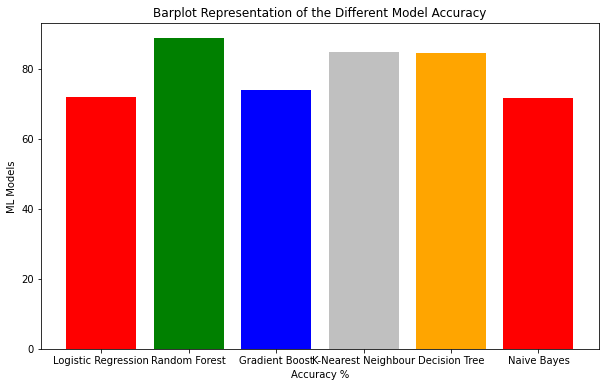

In [ ]:
colors = ['red','green','blue','silver',"orange"]
plt.figure(figsize=(10,6))
plt.title("Barplot Representation of the Different Model Accuracy")
plt.xlabel("Accuracy %")
plt.ylabel("ML Models")
plt.bar(model_evaluation['Model'],model_evaluation['Accuracy'],color = colors)
plt.show()

Do it manually.

<BarContainer object of 5 artists>

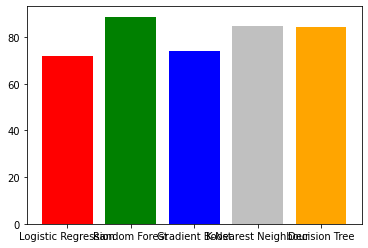

In [ ]:
plt.bar(['Logistic Regression','Random Forest','Gradient Boost','K-Nearest Neighbour','Decision Tree'], [lr_score*100,
                   rf_score*100,gbc_score*100,knn_score*100,dt_score*100],color=['red','green','blue','silver',"orange"])
plt.show()

In [ ]:
#nlargest = featureScores.nlargest(13,'Score')
#largest = nlargest['Specs'].values
#large = heart[largest]
#target = heart['target']
#heart = pd.concat([large,target],axis=1)
#heart.head(2)

In [ ]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#X = heart.drop(['target'],axis =1)
#y = heart['target']
#bestfeatures = SelectKBest(score_func=chi2, k=10)
#fit = bestfeatures.fit(X,y)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X.columns)
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']
#print(featureScores.nlargest(30,'Score')) 

## HyperParameter Tunning on KNearest Neighbour Classifier!


In [ ]:
xtrain.shape

(332302, 10)

In [ ]:
ytrain.shape

(332302,)

In [ ]:
train_score = []
test_score = []
neighbors = range(1, 20)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(xtrain, ytrain)
    train_score.append(accuracy_score(ytrain, model.predict(xtrain)))
    test_score.append(accuracy_score(ytest, model.predict(xtest)))

In [ ]:
print("Train Score", train_score)

Train Score [0.9962413708012591, 0.959097447502573, 0.927018194293143, 0.9164765785339841, 0.8947102334623325, 0.8905874776558672, 0.8747073445239572, 0.8726068455802252, 0.8608314123899344, 0.859760097742415, 0.8499437258878971, 0.8488513460647242, 0.841162556951207, 0.840663011357139, 0.8344397566069419, 0.8339462296344891, 0.8286257681265836, 0.8283067811809739, 0.8234136418077532]


In [ ]:
print("Test Score", test_score)

Test Score [0.8851533535557803, 0.8664957388415426, 0.8618493909191584, 0.855963214406086, 0.848789060619192, 0.8447084597236265, 0.8370889306177476, 0.83510279743849, 0.8285786508738986, 0.82808512687178, 0.8233184072415619, 0.8223554335788916, 0.81754056526554, 0.8180581636092253, 0.813953488372093, 0.8143627521787279, 0.8104627088449131, 0.8112451249458328, 0.8078987914680533]


Ploting accuracy score for tuned KNN

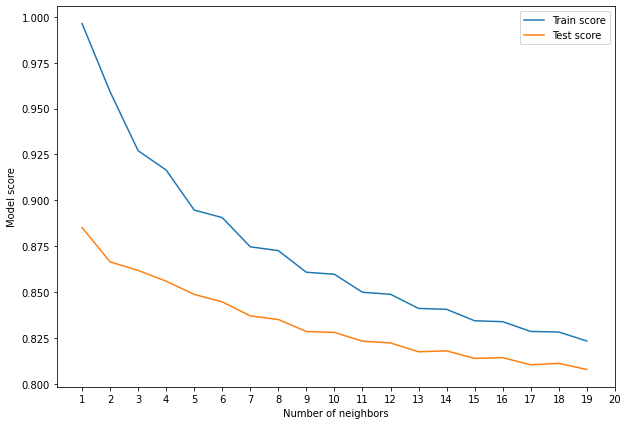

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

#print(f"Maximum KNN score on the training data: {max(train_score)*100:.2f}%")
#print(f"Maximum KNN score on the testing data: {max(test_score)*100:.2f}%")

## HyperParameter Tunning on Logistic Regression Model!

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(xtrain, ytrain)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(xtrain, ytrain)
tscorelr=lr_clf.score(xtrain, ytrain)
testscorelr=lr_clf.score(xtest, ytest)
print(tscorelr)
print(testscorelr)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.03359818286283781, 'solver': 'liblinear'}
0.7204831749432745
0.7206052289469883


In [ ]:
confusion_matrix(ytest,lr_clf.predict(xtest))

array([[28513, 12857],
       [10354, 31352]])

In [ ]:
print(classification_report(ytest,lr_clf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     41370
           1       0.71      0.75      0.73     41706

    accuracy                           0.72     83076
   macro avg       0.72      0.72      0.72     83076
weighted avg       0.72      0.72      0.72     83076



In [ ]:
pd.DataFrame({"Model Name":["Logistic Regression Model","Tuned Logistic Regression Model"],
              "Testing Accuracy":[lr_score,testscorelr]})

#"Training Accuracy":[lr_training_accuracy,tscorelr]"#long string

,Model Name,Testing Accuracy
0,Logistic Regression Model,0.720629
1,Tuned Logistic Regression Model,0.720605


In [ ]:
tuning_results_df = pd.DataFrame(data=[["Logistic Regression",lr_training_accuracy, lr_score],["Tuned Logistic Regression", tscorelr, testscorelr]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,0.720474,0.720629
1,Tuned Logistic Regression,0.720483,0.720605


## Hyperparameter Tuning on Random Forest Algorithm!

In [ ]:
xtrain.shape()

NameError: ignored